In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
 
training_set = np.array([[[3, 3], 1], [[4, 3], 1], [[1, 1], -1], [[5, 2], -1]])    #训练样本
 
a = np.zeros(len(training_set), np.float)    #矩阵a的长度为训练集样本数，类型为float
b = 0.0    #参数初始值为0
Gram = None    #Gram矩阵
y = np.array(training_set[:, 1])    #y=[1 1 -1 -1]
x = np.empty((len(training_set), 2), np.float)    #x为4*2的矩阵
for i in range(len(training_set)): #x=[[3., 3.], [4., 3.], [1., 1.], [5., 2.]]
    x[i] = training_set[i][0]
history = []    #history记录每次迭代结果
 
def cal_gram():
    """
    计算Gram矩阵
    :return:
    """
    g = np.empty((len(training_set), len(training_set)), np.int)
    for i in range(len(training_set)):
        for j in range(len(training_set)):
            g[i][j] = np.dot(training_set[i][0], training_set[j][0]) #G=[xi*xj]
    return g
 
def update(i):
    """
    随机梯度下降更新参数
    :param i:
    :return:
    """
    global a, b
    a[i] += 1    #根据误分类点更新参数
    b = b + 1 * y[i]    #这里1是学习效率η
    history.append([np.dot(a * y, x), b])    #history记录每次迭代结果
    print(a, b)    #输出每次迭代结果
 
 
#计算yi(Gram*xi+b),用来判断是否是误分类点
def cal(i):
    global a, b, x, y
    res = np.dot(a * y, Gram[i])
    res = (res + b) * y[i] #返回
    return res
 
def check():
    global a, b, x, y
    flag = False
    for i in range(len(training_set)):    #遍历每个点
        if cal(i) <= 0:    #如果yi(Gram*xi+b)<=0.则是误分类点
            flag = True
            update(i)    #用误分类点更新参数
    if not flag: #如果已正确分类
        w = np.dot(a * y, x)    #计算w
        print( "RESULT: w: " + str(w) + " b:" + str(b))    #输出最后结果
        return False
    return True
 
 
    Gram = cal_gram()    #初始化 Gram矩阵
    for i in range(1000):    #迭代1000次
        if not check(): break    #如果已正确分类则结束循环
 
    #以下代码是将迭代过程可视化,数据来源于history
    # first set up the figure, the axis, and the plotelement we want to animate
    fig = plt.figure()
    ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
    line, = ax.plot([], [], 'g', lw=2)
    label = ax.text([], [], '')
 
    # initialization function: plot the background of eachframe
    def init():
        line.set_data([], [])
        x, y, x_, y_ = [], [], [], []
        for p in training_set:
            if p[1] > 0:
                x.append(p[0][0])
                y.append(p[0][1])
            else:
                x_.append(p[0][0])
                y_.append(p[0][1])
 
        plt.plot(x, y, 'bo', x_, y_, 'rx')
        plt.axis([-6, 6, -6, 6])
        plt.grid(True)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('PerceptronAlgorithm 2 (www.hankcs.com)')
        return line, label
 
 
    # animation function. this is called sequentially
    def animate(i):
        global history, ax, line, label
 
        w = history[i][0]
        b = history[i][1]
        if w[1] == 0: return line, label
        x1 = -7.0
        y1 = -(b + w[0] * x1) / w[1]
        x2 = 7.0
        y2 = -(b + w[0] * x2) / w[1]
        line.set_data([x1, x2], [y1, y2])
        x1 = 0.0
        y1 = -(b + w[0] * x1) / w[1]
        label.set_text(str(history[i][0]) + ' ' + str(b))
        label.set_position([x1, y1])
        return line, label
 
    # call the animator. blit=true means only re-draw the parts that have changed.
    anim =animation.FuncAnimation(fig, animate, init_func=init, frames=len(history), interval=1000, repeat=True,
                                   blit=True)
    plt.show()

<ipython-input-2-9ed93c46a51a>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  training_set = np.array([[[3, 3], 1], [[4, 3], 1], [[1, 1], -1], [[5, 2], -1]])    #训练样本
<ipython-input-2-9ed93c46a51a>:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  a = np.zeros(len(training_set), np.float)    #矩阵a的长度为训练集样本数，类型为float
<ipython-input-2-9ed93c46a51a>:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this w

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
irisset = datasets.load_iris()
irisset = np.array(irisset.data)

In [8]:
irisset[:100,:2]

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

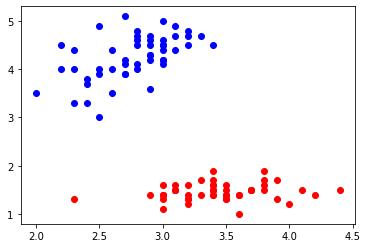

In [14]:
plt.scatter(irisset[:50,1:2],irisset[:50,2:3],color='red')
plt.scatter(irisset[50:100,1:2],irisset[50:100,2:3],color='blue')